# Spatial Tournament Examples : Lattice Topology

In this notebook we will be performing a lattice structured tournament. Ten random players are selected by the list of strategies in Axelrod. Afterwards these players are allocated into a square lattice network where each player competes with four neughboors. Then we plot the results.


In [1]:
# Python 3 
%matplotlib inline

import matplotlib.pyplot as plt
import random

# package for creation and visuliazation of networks
import networkx as nx 
from networkx.drawing.nx_agraph import graphviz_layout

import axelrod as axl

In [2]:
strategies = [s() for s in axl.strategies]

In [3]:
players = random.sample([s() for s in axl.strategies], 10)

In [6]:
G = nx.newman_watts_strogatz_graph(len(players), 4, 0)

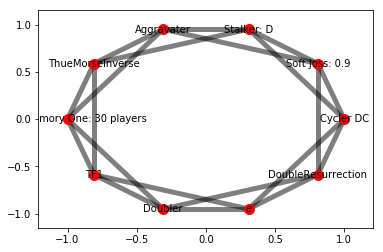

In [8]:
pos = nx.circular_layout(G)
# for the nodes 
nx.draw_networkx_nodes(G,pos,
                       node_color='r',
                       node_size=100
                       )
# for the edges
nx.draw_networkx_edges(G,pos,
                       width=5, alpha = 0.5)
# using labels
labels={}
for i in range(len(players)):
    labels[i]= '%s' % (players[i])

nx.draw_networkx_labels(G,pos,labels,font_size=10)
plt.show()

In [9]:
edges = G.edges()
tournament = axl.Tournament(players, edges=G.edges(), repetitions=1)
results = tournament.play(processes=1)

Finishing: 100%|██████████| 33/33 [00:00<00:00, 574.10it/s]


In [10]:
results.ranked_names

['Cycler DC',
 'DoubleResurrection',
 'TF1',
 'Doubler',
 'Soft Joss: 0.9',
 'Stalker: D',
 'NMWE Memory One: 30 players',
 '$e$',
 'Aggravater',
 'ThueMorseInverse']

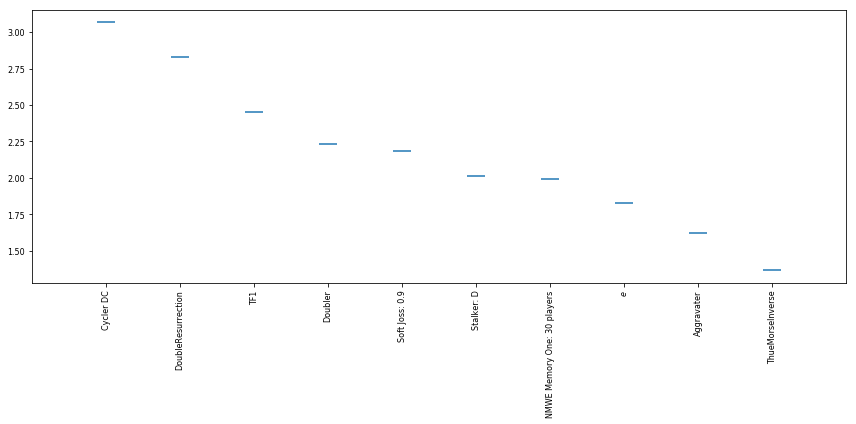

In [11]:
plot = axl.Plot(results)
plot.boxplot();